In [1]:
import numpy as np
import pylab as pl
from numpy import fft
import pandas as pd

In [2]:
def fourierT_test(x, n_predict):
    n = x.size
    n_harm = 1   # number of harmonics in model
    
    #taking t as n integers from 1 to n 
    t = np.arange(0, n)
    #find trend using polyfit , i adopted degree 3
    p = np.polyfit(t, x, 1)
    print("the coefficients of nearly fitted polynomial :",p)
    #Subtract the trend found above
    x_notrend = x - ((p[0] * (t)) + (p[1]))        # detrended x
    print("no trend data : " ,x_notrend)
    # detrended x in frequency domain
    x_freqdom = fft.fft(x_notrend)  #Return the Discrete Fourier Transform sample frequencies.
    print("frequency domain values : " ,x_freqdom)

    f = fft.fftfreq(n)              # Return the Discrete Fourier Transform sample frequencies.
    print("sample frequency values : ",f)
    
    indexes = list(range(n))
    indexes = np.array(range(0,n))
    indexes = sorted(indexes,key = lambda i: np.absolute(f[i])) 
    print("sorted frequencies indexes :", indexes)
    t = np.arange(0, n + n_predict)
    restored_sig = np.zeros(t.size)  #initialize to zero
    print("These frequencies are choosen as our main frequecies which are useful to convert to main space domain sequence",indexes[:1 + n_harm * 2])
    for i in indexes[:1 + n_harm * 2]:
        ampli = np.absolute(x_freqdom[i]) / n   # amplitude calculation
        print("amplitude : ",ampli)
        print()
        phase = np.angle(x_freqdom[i])          # phase calculation
        print("phase : ",phase)
        print()
        restored_sig += ampli * np.cos(2 * np.pi * f[i] * t + phase)  # restored sig is A*cos(2*pi*f*t + phase)
        print()
    print("final restored-sig values are :" , restored_sig)    
    print("final values are ",restored_sig + ((p[0]*t)+p[1]))
    return restored_sig + ((p[0]*t)+p[1])  # add the trend and return

the coefficients of nearly fitted polynomial : [ 3.3 -0.7]
no trend data :  [ 0.7 -0.6 -0.9  0.8]
frequency domain values :  [-1.66533454e-15+0.j   1.60000000e+00+1.4j -4.00000000e-01+0.j
  1.60000000e+00-1.4j]
sample frequency values :  [ 0.    0.25 -0.5  -0.25]
sorted frequencies indexes : [0, 1, 3, 2]
These frequencies are choosen as our main frequecies which are useful to convert to main space domain sequence [0, 1, 3]
amplitude :  4.163336342344337e-16

phase :  3.141592653589793


amplitude :  0.5315072906367326

phase :  0.7188299996216253


amplitude :  0.5315072906367326

phase :  -0.7188299996216253


final restored-sig values are : [ 0.8 -0.7 -0.8  0.7  0.8 -0.7]
final values are  [ 0.1  1.9  5.1  9.9 13.3 15.1]


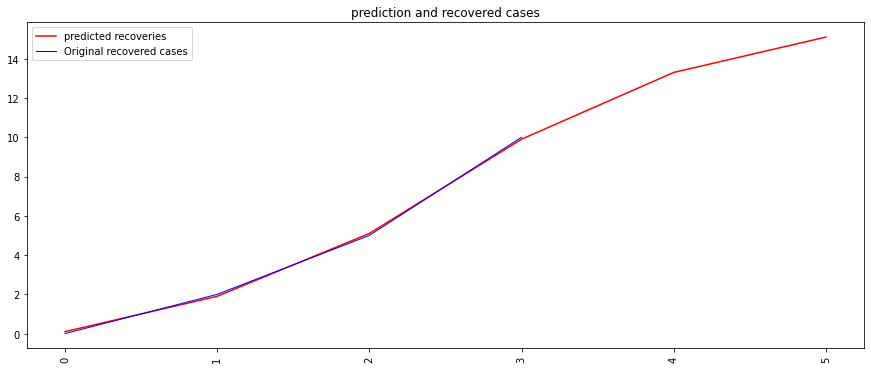

In [3]:
def main():
    x=[0,2,5,10]
    
    x=np.array(x)
    n_predict = 2
    predictions = fourierT_test(x, n_predict)


    fig = pl.figure(figsize=(15,6))
    ax1 = fig.add_subplot() 
    ax1.tick_params(axis ='x', rotation = 90) 
    pl.title("prediction and recovered cases")
    pl.plot(np.arange(0, predictions.size), predictions, 'r', label = 'predicted recoveries')
    pl.plot([0,1,2,3], x, 'b', label = 'Original recovered cases', linewidth = 1)
    pl.legend()
    pl.show()
    
if __name__ == "__main__":
    main()